### Import previous notebook for variables

In [1]:
%run data_explore.ipynb

In [19]:

%matplotlib inline

from datetime import datetime

import geopandas as gp
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Visualize by County

In [21]:
counties_ca.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
8,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,None,None,None,A,2468694582,23299110,+39.5769252,-120.5219926,"POLYGON ((-120.65559 39.69356, -120.65552 39.6..."
325,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,40900,None,A,2500040418,75346029,+38.4501363,-121.3443291,"POLYGON ((-121.18857 38.71431, -121.18731 38.7..."
329,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,None,42200,None,A,7080860393,2729213352,+34.5366774,-120.0383645,"MULTIPOLYGON (((-120.73429 34.90069, -120.7343..."
346,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,None,None,A,2641837359,43789489,+38.1910682,-120.5541065,"POLYGON ((-120.63093 38.34110, -120.63057 38.3..."
394,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,37100,None,A,4767622152,947345735,+34.3587477,-119.1331453,"MULTIPOLYGON (((-119.32922 34.22784, -119.3292..."


In [32]:
len(counties_ca)

58

In [23]:
ookla_df_ca.head()

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,type,quarter,year,STATEFP,...,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,tile,state_v1,county_v1,geoid_v1
0,230132213022331,150296,18042,13,49,20,fixed,Q1,2021,6,...,1400000US06073003115,6073003115,31.15,CT,1532911,0,"list(c(-117.031860351562, -117.0263671875, -11...",6,073,003115
1,230121200021331,177210,14681,10,25,5,fixed,Q1,2021,6,...,1400000US06079010707,6079010707,107.07,CT,14046662,10955892,"list(c(-120.855102539062, -120.849609375, -120...",6,079,010707
2,230102300101221,141195,9852,15,36,17,fixed,Q1,2021,6,...,1400000US06001433700,6001433700,4337.00,CT,1311721,0,"list(c(-122.118530273438, -122.113037109375, -...",6,001,433700
3,230132002000102,185117,13621,13,77,27,fixed,Q1,2021,6,...,1400000US06037532101,6037532101,5321.01,CT,1383491,52594,"list(c(-118.10302734375, -118.097534179688, -1...",6,037,532101
4,230102321131320,31037,35988,38,12,2,fixed,Q1,2021,6,...,1400000US06085512200,6085512200,5122.00,CT,262653293,2006686,"list(c(-121.66259765625, -121.657104492188, -1...",6,085,512200


In [24]:
fcc_ookla_ca_geo_merge_inner.head()

,tract,max_dn,max_up,dn10,dn100,dn250,fiber_100u,state,GEOID,quadkey,...,avg_lat_ms,tests,devices,year,STATEFP,COUNTYFP,TRACTCE,NAME,ALAND,AWATER
0,6001400100,826.948052,402.597403,3.155844,1.233766,1.103896,0.428571,6,6001400100,2.301021e+14,...,22.461538,19.974359,5.948718,2021.0,6.0,1.0,400100.0,4001.0,6894339.0,0.0
1,6001400200,1449.951220,709.756098,4.439024,3.024390,1.707317,0.951220,6,6001400200,2.301021e+14,...,19.000000,113.250000,18.375000,2021.0,6.0,1.0,400200.0,4002.0,586559.0,0.0
2,6001400300,720.142857,626.373626,4.329670,2.428571,1.208791,0.571429,6,6001400300,2.301021e+14,...,22.086957,54.043478,17.217391,2021.0,6.0,1.0,400300.0,4003.0,1105851.0,0.0
3,6001400400,1592.000000,731.578947,5.175439,3.473684,2.245614,1.350877,6,6001400400,2.301021e+14,...,16.666667,63.666667,16.750000,2021.0,6.0,1.0,400400.0,4004.0,715630.0,0.0
4,6001400500,1655.755556,792.222222,5.511111,3.622222,2.088889,1.177778,6,6001400500,2.301021e+14,...,19.375000,24.125000,11.750000,2021.0,6.0,1.0,400500.0,4005.0,590297.0,0.0


In [25]:
#county_data = counties_ca[['GEOID', 'geometry']].merge(county_stats, on='GEOID').to_crs(26916)
county_data = counties_ca[['GEOID', 'geometry']].to_crs(26916)

In [31]:
county_data['group'] = pd.Series(np.random.randint(0,100, size=len(county_data)))

58


In [ ]:
### Attempt to visualize the data [TODO]

(-2460482.30544988, -2344846.957944515, 4920844.99926136, 4997222.114116899)

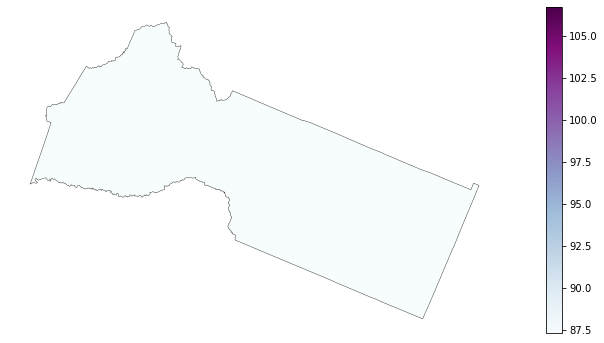

In [33]:
fig, ax = plt.subplots(1, figsize=(16, 6))

county_data.plot(
    column="group", cmap="BuPu", linewidth=0.4, ax=ax, edgecolor="0.1", legend=True
)
ax.axis("off")

